# EDA

## Loading Libraries and Dataframes

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

In [2]:
client_data_df = pd.read_csv("Datasets/client_data.csv")
client_data_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [3]:
price_data_df = pd.read_csv("Datasets/price_data.csv")
price_data_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


This dataset appears to primarily be numerical and has dates. This can be useful in seeing the change in prices over the months and comparing them to the forecasted.

## Data Information

### Client Data

In [4]:
client_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

With the dataframes info above, I can verify the column data types and that there are no null values. There are a lof of category columns which could be useful in seeing how it might affect churning.

In [5]:
client_data_df.nunique()

id                                14606
channel_sales                         8
cons_12m                          11065
cons_gas_12m                       2112
cons_last_month                    4751
date_activ                         1796
date_end                            368
date_modif_prod                    2129
date_renewal                        386
forecast_cons_12m                 13993
forecast_cons_year                 4218
forecast_discount_energy             12
forecast_meter_rent_12m            3528
forecast_price_energy_off_peak      516
forecast_price_energy_peak          329
forecast_price_pow_off_peak          41
has_gas                               2
imp_cons                           7752
margin_gross_pow_ele               2391
margin_net_pow_ele                 2391
nb_prod_act                          10
net_margin                        11965
num_years_antig                      13
origin_up                             6
pow_max                             698


Several columns can not be used for category axis since it will make the plot particularly unreadable.

In [6]:
client_data_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


It would appear that there is about 9.7% of clients that have churned. The mean of the recorded consumption of electrcity and gas are much higher than the forcasted by about 10 times.

### Price Data

In [7]:
price_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [8]:
price_data_df.nunique()

id                    16096
price_date               12
price_off_peak_var     1853
price_peak_var         1189
price_mid_peak_var      711
price_off_peak_fix       66
price_peak_fix           31
price_mid_peak_fix       28
dtype: int64

The prices for power appear to have drastically less variety in comparasion to energy despite the amount of data there is. Over 20 times the amount for each of them.

In [9]:
price_data_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


The price of power is much higher than energy so that is likely the reason why there is less variety in it.

## Visualizations

### Client Dataframe Visuals

In [10]:
clients_churn = client_data_df.groupby(["churn"], as_index=False)["churn"].count()
clients_churn

,churn
0,13187
1,1419


This is created to compare the amount of clients that have churned and that not.

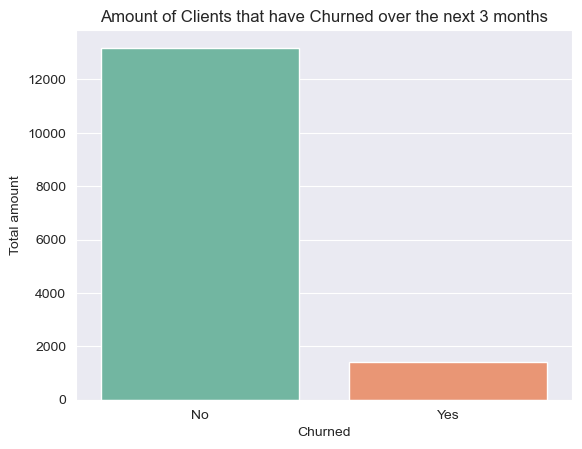

In [11]:
ax = sns.barplot(x="index", y="churn", data=clients_churn.reset_index(), palette=sns.color_palette("Set2"))
title = ax.set_title("Amount of Clients that have Churned over the next 3 months")
labels = ax.set(xlabel="Churned", ylabel="Total amount")
ticks = ax.set_xticklabels(["No", "Yes"])

As we can see here about 13,000 clients have stayed with PowerCo while roughly 1400 have left.

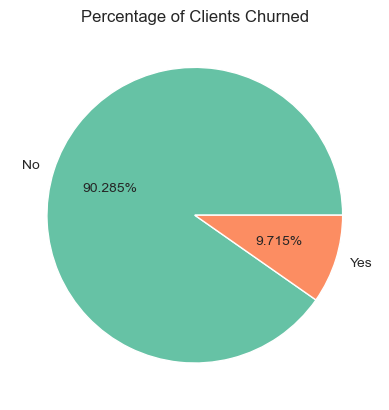

In [12]:
churn_percentage = round((clients_churn / clients_churn.sum()) * 100, 3)
plot = plt.pie(clients_churn["churn"], labels=["No", "Yes"], colors=sns.color_palette("Set2"), autopct='%.3f%%')
title = plt.title("Percentage of Clients Churned")

With those numbers in mind, we are able to see the percentage of those that have been kept here. Nearly 10% of clients have left which is more than what you would want.

In [13]:
gas_churn = client_data_df.groupby(["has_gas", "churn"])["id"].count().reset_index()
no_gas_sum = gas_churn["id"][gas_churn["has_gas"] == "f"].sum()
has_gas_sum = gas_churn["id"][gas_churn["has_gas"] == "t"].sum()
prct_churn = []
for i in gas_churn.itertuples():
    if i[1] == "f":
        prct_churn.append(str(round((i[3] / no_gas_sum) * 100, 2)) + "%")
    else:
        prct_churn.append(str(round((i[3] / has_gas_sum) * 100, 2)) + "%")
temp = prct_churn[1]
prct_churn[1] = prct_churn[2]
prct_churn[2] = temp

I wrote this to create a dataframe see how many clients have churned based on if they had gas or did not.

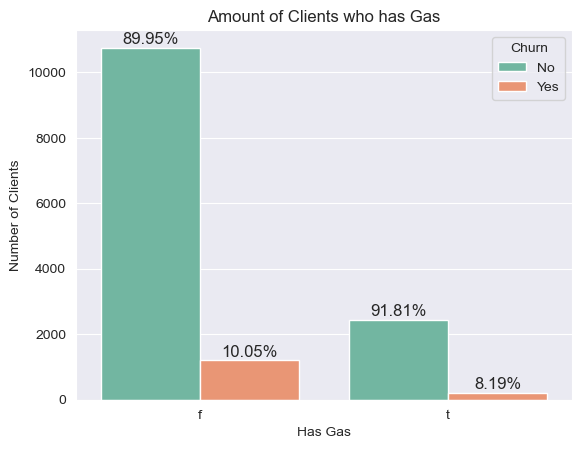

In [14]:
bar = sns.barplot(x="has_gas", y="id", hue="churn", data=gas_churn, palette=sns.color_palette("Set2"))
j = 0
for i in bar.patches: 
    bar.annotate(format(prct_churn[j]), 
                   (i.get_x() + i.get_width() / 2., i.get_height()), 
                   ha='center', va='center', 
                   size=12,
                   xytext=(0, 6), 
                   textcoords='offset points') 
    j += 1
labels = bar.set(xlabel="Has Gas", ylabel="Number of Clients")
title = bar.set_title("Amount of Clients who has Gas")
handles, _ = bar.get_legend_handles_labels()
bar.legend(handles, ["No", "Yes"], loc="upper right", title="Churn")
plt.show()

Now we are able to see that the clients that did not have gas had a slightly higher chance of 2% to churn then those that did. Though that might not seem like it matters much more when we take in mind that there is nearly 5 times the amount of clients with no gas compared to those who has. So that 10% is much more crucial to handle.

In [15]:
channel_sales_df = client_data_df.groupby("channel_sales")[["cons_12m", "cons_gas_12m", "cons_last_month", "churn"]].sum().reset_index()

C:\Users\Taco\AppData\Local\Temp\ipykernel_21260\3128401826.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar.set_yticklabels(ylabels)


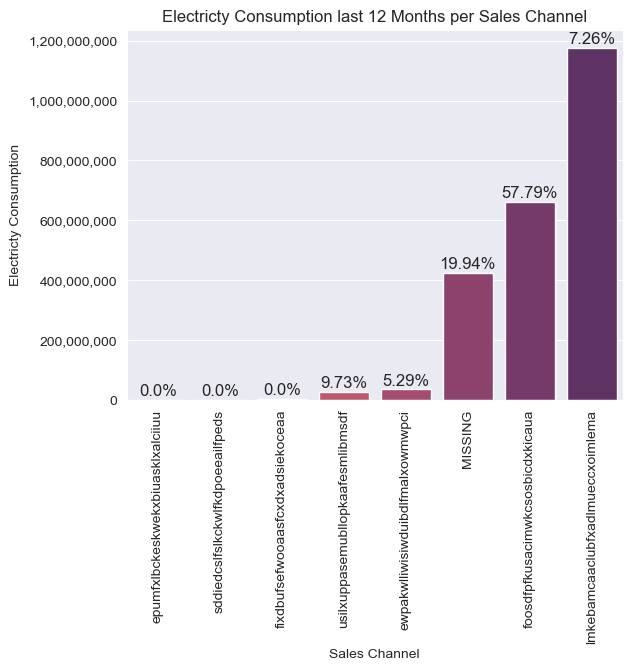

In [16]:
bar = sns.barplot(x="channel_sales", y="cons_12m", data=channel_sales_df, order=channel_sales_df.sort_values("cons_12m").channel_sales, palette="flare")
title = bar.set_title("Electricty Consumption last 12 Months per Sales Channel")
labels = bar.set(xlabel="Sales Channel", ylabel="Electricty Consumption")
ax = bar.set_xticklabels(labels=bar.get_xticklabels(), rotation=90)
ylabels = ["{:,.0f}".format(y) for y in bar.get_yticks()]

prct_churn = round((channel_sales_df.sort_values("cons_12m")["churn"] / channel_sales_df["churn"].sum()) * 100, 2).reset_index()["churn"]
j = 0
for i in bar.patches: 
    bar.annotate(format(prct_churn[j]) + "%", 
                   (i.get_x() + i.get_width() / 2., i.get_height()), 
                   ha='center', va='center', 
                   size=12,
                   xytext=(0, 6), 
                   textcoords='offset points') 
    j += 1
bar.set_yticklabels(ylabels)
bar.yaxis.offsetText.set_visible(False)

The percent above the bar graphs represent the amount of clients that have churned in each sale channel. We can directly see that the second highest electricy consumption sales channel has a churn percentage of 57.79%. This is over double of the next highest of 19.94%.

C:\Users\Taco\AppData\Local\Temp\ipykernel_21260\723688162.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar.set_yticklabels(ylabels)


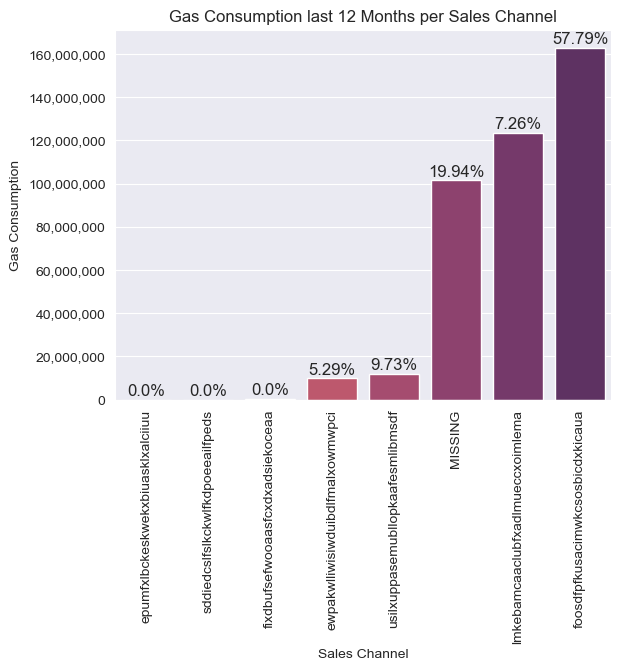

In [17]:
bar = sns.barplot(x="channel_sales", y="cons_gas_12m", data=channel_sales_df, order=channel_sales_df.sort_values("cons_gas_12m").channel_sales, palette="flare")
title = bar.set_title("Gas Consumption last 12 Months per Sales Channel")
labels = bar.set(xlabel="Sales Channel", ylabel="Gas Consumption")
ax = bar.set_xticklabels(labels=bar.get_xticklabels(), rotation=90)
ylabels = ["{:,.0f}".format(y) for y in bar.get_yticks()]

prct_churn = round((channel_sales_df.sort_values("cons_gas_12m")["churn"] / channel_sales_df["churn"].sum()) * 100, 2).reset_index()["churn"]
j = 0
for i in bar.patches: 
    bar.annotate(format(prct_churn[j]) + "%", 
                   (i.get_x() + i.get_width() / 2., i.get_height()), 
                   ha='center', va='center', 
                   size=12,
                   xytext=(0, 6), 
                   textcoords='offset points') 
    j += 1
bar.set_yticklabels(ylabels)
bar.yaxis.offsetText.set_visible(False)

We can quickly see here that sales channel that was performing the second highest previously is first in gas consumption.

C:\Users\Taco\AppData\Local\Temp\ipykernel_21260\3818649798.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar.set_yticklabels(ylabels)


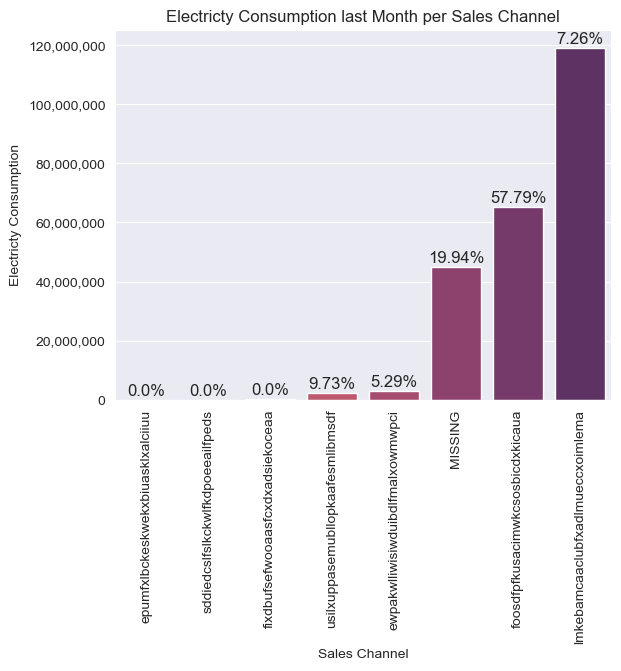

In [18]:
bar = sns.barplot(x="channel_sales", y="cons_last_month", data=channel_sales_df, order=channel_sales_df.sort_values("cons_last_month").channel_sales, palette="flare")
title = bar.set_title("Electricty Consumption last Month per Sales Channel")
labels = bar.set(xlabel="Sales Channel", ylabel="Electricty Consumption")
ax = bar.set_xticklabels(labels=bar.get_xticklabels(), rotation=90)
ylabels = ["{:,.0f}".format(y) for y in bar.get_yticks()]

prct_churn = round((channel_sales_df.sort_values("cons_last_month")["churn"] / channel_sales_df["churn"].sum()) * 100, 2).reset_index()["churn"]
j = 0
for i in bar.patches: 
    bar.annotate(format(prct_churn[j]) + "%", 
                   (i.get_x() + i.get_width() / 2., i.get_height()), 
                   ha='center', va='center', 
                   size=12,
                   xytext=(0, 6), 
                   textcoords='offset points') 
    j += 1
bar.set_yticklabels(ylabels)
bar.yaxis.offsetText.set_visible(False)

This graph shows us a similar result has the first electricty consumption model. This simply reinforces the idea that has been made thus far.

In [19]:
client_contract_df = client_data_df[["date_activ", "date_end", "date_modif_prod", "date_renewal", "num_years_antig", "churn"]].copy()
client_contract_df["date_activ"] = pd.to_datetime(client_contract_df["date_activ"])
client_contract_df["date_end"] = pd.to_datetime(client_contract_df["date_end"])
client_contract_df["date_modif_prod"] = pd.to_datetime(client_contract_df["date_modif_prod"])
# client_contract_df["contract_length"] = (round((client_contract_df["date_end"] - client_contract_df["date_activ"]) / np.timedelta64(1, "Y"))).astype(int)
client_contract_df["last_modif_from_activ"] = (round((client_contract_df["date_modif_prod"] - client_contract_df["date_activ"]) / np.timedelta64(1, "M"))).astype(int)

In [20]:
churn_prct_per_yr = list(round(client_contract_df.groupby("num_years_antig")["churn"].sum() / client_contract_df.groupby("num_years_antig")["churn"].count() * 100, 1))
churn_prct_per_yr = [str(i)+"%" for i in churn_prct_per_yr]

The above two cells were developed to see the amount of clients that churned based on the amount of years they have stayed.

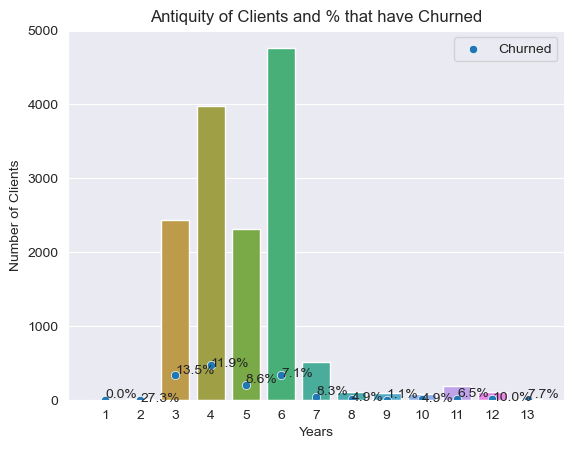

In [21]:
bar = sns.barplot(x=client_contract_df.num_years_antig.value_counts().index, y=client_contract_df["num_years_antig"].value_counts(), data=client_contract_df)
scatter = sns.scatterplot(x=range(0,13), y=client_contract_df.groupby("num_years_antig")["churn"].sum(), legend="brief", label="Churned")
labels = bar.set(xlabel="Years", ylabel="Number of Clients")
title = bar.set_title("Antiquity of Clients and % that have Churned")

for i in range(0, 13):
    if i % 2 == 1:
        scatter.text(i, list(client_contract_df.groupby("num_years_antig")["churn"].sum())[i]-25, churn_prct_per_yr[i])
    if i % 2 == 0:
        scatter.text(i, list(client_contract_df.groupby("num_years_antig")["churn"].sum())[i]+25, churn_prct_per_yr[i])

It is easy to see that there is a negative correlation between a client churning and the amount of years they have stayed based on the percentages. The percentage clients that have left are much higher for those that only have been around for 4 years or less. The percent that have left then goes lower by 3% following that then is nearly halfed once you reach year 8. This continues to stay low for awhile till year 12 or 13 where it jumps up and down.

### Client and Price Visuals

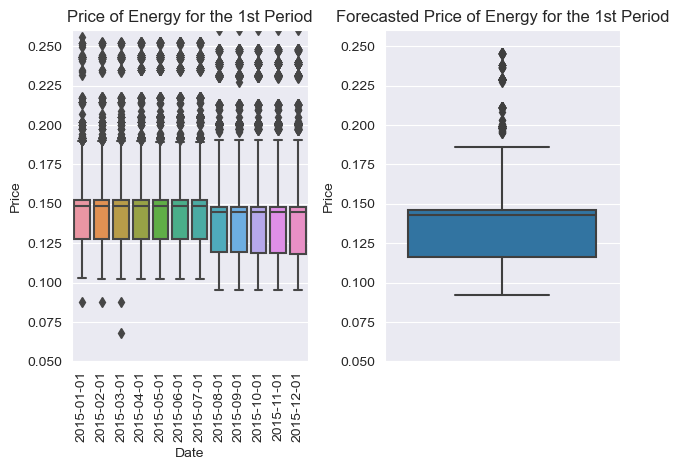

In [22]:
fig, axes = plt.subplots(1, 2)
bx_1 = sns.boxplot(x="price_date", y="price_off_peak_var", data=price_data_df, ax=axes[0])
bx_2 = sns.boxplot(y="forecast_price_energy_off_peak", data=client_data_df, ax=axes[1])
axes_1 = bx_1.set_ylim([0.05, 0.26])
axes_1 = bx_1.set(xlabel="Date", ylabel="Price")
axes_1 = bx_1.set_xticklabels(labels=bx_1.get_xticklabels(), rotation=90)
title_1 = bx_1.set_title("Price of Energy for the 1st Period")
axes_2 = bx_2.set_ylim([0.05, 0.26])
axes_2 = bx_2.set(ylabel="Price")
title_2 = bx_2.set_title("Forecasted Price of Energy for the 1st Period")
fig.tight_layout()

Looking at the box plots, we can see that the forecasted price appears to match the last energy price for the first period. It would also appear that the price of energy for the 1st period stays consistent throughout.

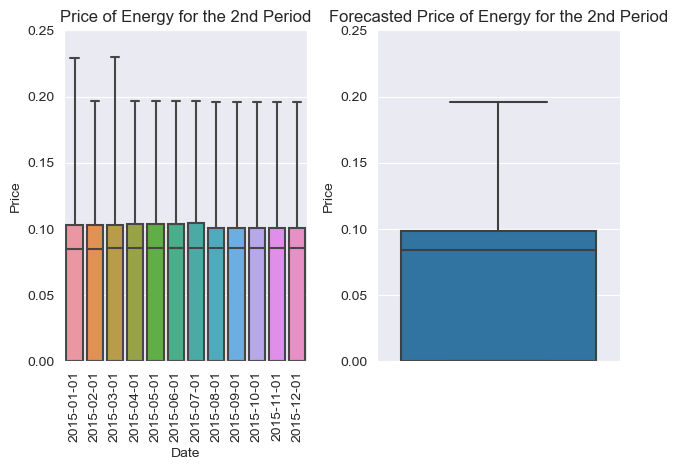

In [23]:
fig, axes = plt.subplots(1, 2)
bx_1 = sns.boxplot(x="price_date", y="price_peak_var", data=price_data_df, ax=axes[0])
bx_2 = sns.boxplot(y="forecast_price_energy_peak", data=client_data_df, ax=axes[1])
axes_1 = bx_1.set_ylim([0, 0.25])
axes_1 = bx_1.set(xlabel="Date", ylabel="Price")
axes_1 = bx_1.set_xticklabels(labels=bx_1.get_xticklabels(), rotation=90)
title_1 = bx_1.set_title("Price of Energy for the 2nd Period")
axes_2 = bx_2.set_ylim([0, 0.25])
axes_2 = bx_2.set(ylabel="Price")
title_2 = bx_2.set_title("Forecasted Price of Energy for the 2nd Period")
fig.tight_layout()

It would appear that the price of energy stayed about the same throughout the year except at the start where the whiskers extend slightly before being consistent again. Though it would appear that the forecasted boxplot's 75% is slightly lower.

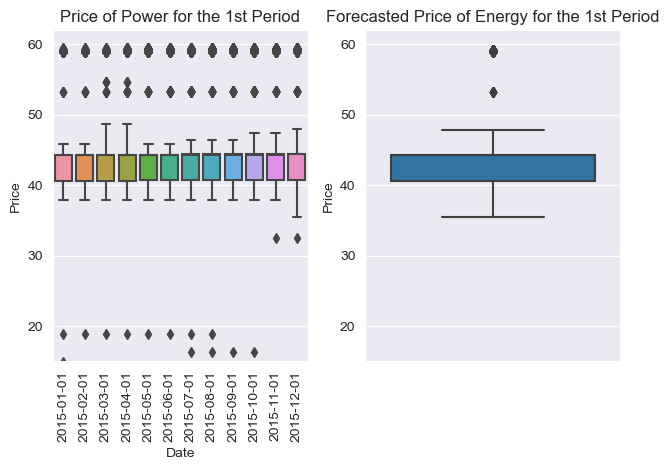

In [24]:
fig, axes = plt.subplots(1, 2)
bx_1 = sns.boxplot(x="price_date", y="price_off_peak_fix", data=price_data_df, ax=axes[0])
bx_2 = sns.boxplot(y="forecast_price_pow_off_peak", data=client_data_df, ax=axes[1])
axes_1 = bx_1.set_ylim([15,62])
axes_2 = bx_2.set_ylim([15,62])
axes_1 = bx_1.set(xlabel="Date", ylabel="Price")
axes_1 = bx_1.set_xticklabels(labels=bx_1.get_xticklabels(), rotation=90)
title_1 = bx_1.set_title("Price of Power for the 1st Period")
axes_2 = bx_2.set(ylabel="Price")
title_2 = bx_2.set_title("Forecasted Price of Energy for the 1st Period")
fig.tight_layout()

Even though the change may be smaller, the prices of power for the 1st period change regularly throughout the year. Since the forecasted price appears to follow the very last date, there is a likely chance it will be different than what is shown.